#### __POSTTEST 7 KECERDASAN BUATAN__
#### Nama : Puput Widyastuti
#### Nim  : 2109106074
#### Kelas: Informatika B121

### Link :
https://www.kaggle.com/datasets/sachinkumar413/diabetic-retinopathy-dataset

In [1]:
#untuk mengimpor library yang akan digunakan
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpig
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.optimizers import Adam
import os
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import shutil

**AUGMENTASI DATA**

In [2]:
train_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range = 0.45,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [3]:
#untuk menginisialisasi test & val
test_datagen = ImageDataGenerator(
    rescale = 1.0/255
)
val_datagen = ImageDataGenerator(
    rescale = 1.0/255
)

In [4]:
#SPLIT DATA MENJADI TRAIN, TEST, DAN VAL

#untuk membuat path ke direktori utama dari folder 'Diabetic_Rethinopathy_Dataset'
dataset_dir = 'Diabetic_Rethinopathy_Dataset'
#untuk membagi proporsi dataset
train_ratio = 0.5
test_ratio = 0.10
val_ratio = 0.10

#nama kelas yang digunakan
class_nms = [
    'Healthy',
    'Mild DR',
    'Moderate DR',
    'Proliferate DR',
    'Severe DR'
]

for class_nm in class_nms :
    #untuk membagi data pada setiap kelas yang digunakan
    class_dir = os.path.join(dataset_dir, class_nm)
    filenames = os.listdir(class_dir)
    train_files, test_val_files = train_test_split(
        filenames, 
        test_size = (val_ratio + test_ratio), 
        random_state = 42
    )
    val_files, test_files = train_test_split(
        test_val_files, 
        test_size = test_ratio / (val_ratio + test_ratio), 
        random_state = 42
    )
    #untuk membuat direktori pada subset train
    train_dir = os.path.join(dataset_dir, 'train', class_nm)
    #untuk membuat direktori pada subset test
    test_dir = os.path.join(dataset_dir, 'test', class_nm)
    #untuk membuat direktori pada subset val
    val_dir = os.path.join(dataset_dir, 'val', class_nm)
    os.makedirs(train_dir, exist_ok = True)
    os.makedirs(test_dir, exist_ok = True)
    os.makedirs(val_dir, exist_ok = True)

    #untuk mengcopy gambar pada dataset kedalam subset yang sudah dibuat 'train'
    for filename in train_files :
        src = os.path.join(class_dir, filename)
        dst = os.path.join(train_dir, filename)
        shutil.copy(src, dst)
    
    #untuk mengcopy gambar pada dataset kedalam subset yang sudah dibuat 'test'
    for filename in test_files :
        src = os.path.join(class_dir, filename)
        dst = os.path.join(test_dir, filename)
        shutil.copy(src, dst)

    #untuk mengcopy gambar pada dataset kedalam subset yang sudah dibuat 'val'
    for filename in val_files :
        src = os.path.join(class_dir, filename)
        dst = os.path.join(val_dir, filename)
        shutil.copy(src, dst)

#untuk membuat flow dari direktori
train_dir = 'Diabetic_Rethinopathy_Dataset//train'  #untuk membuat direktori dari subset train
train_generator = train_datagen.flow_from_directory(   
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    shuffle = True,
    class_mode = 'categorical'
)
test_dir = 'Diabetic_Rethinopathy_Dataset//test'   #untuk membuat direktori dari subset test
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 32,
    shuffle = True,
    class_mode = 'categorical'
)
val_Dir = 'Diabetic_Rethinopathy_Dataset//val'    #untuk membuat direktori dari subset val
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (150, 150),
    batch_size = 32,
    shuffle = True,
    class_mode = 'categorical'
)

Found 2200 images belonging to 5 classes.
Found 275 images belonging to 5 classes.
Found 0 images belonging to 0 classes.


**SEQUENTIAL MODEL**

In [ ]:
#UNTUK MEMBUAT SEQUENTIAL MODEL
model = Sequential([
    layers.Conv2D(128, (3, 3),
                  activation='relu',
                  input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    #LAYER FLATTEN
    layers.Flatten(),
    #full-connected layer
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])

#UNTUK MENGCOMPILE MODEL YANG DIBUAT
model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy', ]
)
#UNTUK MENERAPKAN CALLBACK
es=EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)
model.fit(train_generator, epochs=10, validation_data=val_generator)

#UNTUK MELATIH MODEL
history = model.fit(train_generator, validation_data = val_generator, epochs = 10, verbose = 1, callbacks=[es])

Epoch 1/10
69/69 [==============================] - 253s 4s/step - loss: 1.3417 - accuracy: 0.4500
Epoch 2/10
69/69 [==============================] - 238s 3s/step - loss: 1.2328 - accuracy: 0.5450
Epoch 3/10
69/69 [==============================] - 237s 3s/step - loss: 1.1894 - accuracy: 0.5609
Epoch 4/10
69/69 [==============================] - 240s 3s/step - loss: 1.1676 - accuracy: 0.5718
Epoch 5/10
69/69 [==============================] - 239s 3s/step - loss: 1.1410 - accuracy: 0.5750
Epoch 6/10
69/69 [==============================] - 240s 3s/step - loss: 1.1045 - accuracy: 0.5841
Epoch 7/10
69/69 [==============================] - 239s 3s/step - loss: 1.1162 - accuracy: 0.5805
Epoch 8/10
69/69 [==============================] - 238s 3s/step - loss: 1.0743 - accuracy: 0.5923
Epoch 9/10
69/69 [==============================] - 241s 3s/step - loss: 1.0702 - accuracy: 0.5945
Epoch 10/10
69/69 [==============================] - 240s 3s/step - loss: 1.0560 - accuracy: 0.6018
Epoch 1/1

In [ ]:
#UNTUK MENGEVALUASI MODEL
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Loss     : {test_loss}')
print(f'Accuracy : {test_accuracy}')
print('===================================')

**Grafik yang menampilkan pergerakan metrik (akurasi/error) dan loss terhadap epoch baik pada training maupun validation**

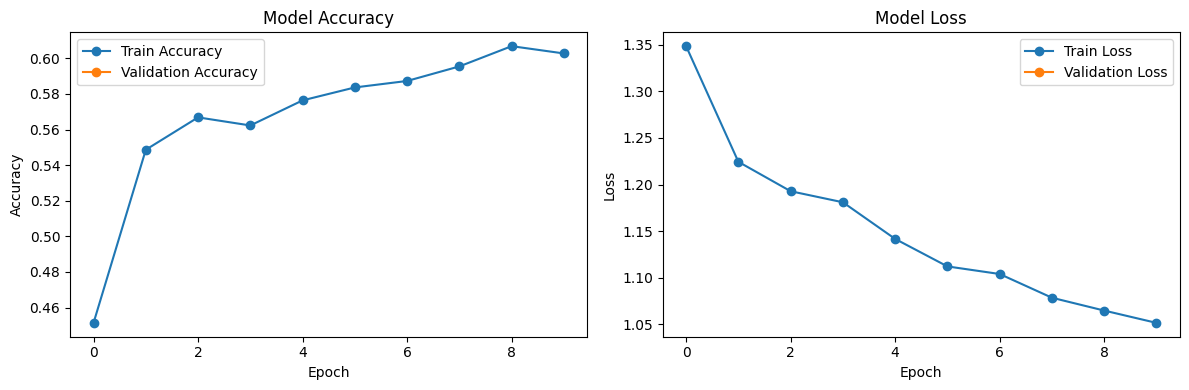

In [10]:
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']
#val_accuracy = history.history['val_accuracy']
val_accuracy = history.history.get('val_accuracy', [])
#val_loss = history.history['val_loss']
val_loss = history.history.get('val_loss', [])

plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label = 'Train Accuracy', marker = 'o')
plt.plot(val_accuracy, label = 'Validation Accuracy', marker = 'o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_loss, label = 'Train Loss', marker = 'o')
plt.plot(val_loss, label = 'Validation Loss', marker = 'o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()